### Preprocessing

In [1]:
import pandas as pd

In [2]:
df_target=pd.read_csv('dataset_target.csv')

In [3]:
df_target.head()

Date        High         Low        Open       Close   Volume  \
0  2017-05-10  953.750000  945.000000  953.500000  948.950012  2096500   
1  2017-05-11  950.289978  940.780029  945.109985  947.619995  2194100   
2  2017-05-12  962.789978  951.530029  954.500000  961.349976  3625900   
3  2017-05-15  963.150024  956.059998  958.729980  957.969971  4270600   
4  2017-05-16  970.059998  960.909973  961.000000  966.070007  3126100   

    Adj Close  
0  948.950012  
1  947.619995  
2  961.349976  
3  957.969971  
4  966.070007

In [4]:
df_target['Moving_av']= df_target['Adj Close'].rolling(window=20,min_periods=0).mean()

In [5]:
df_target.head()

Date        High         Low        Open       Close   Volume  \
0  2017-05-10  953.750000  945.000000  953.500000  948.950012  2096500   
1  2017-05-11  950.289978  940.780029  945.109985  947.619995  2194100   
2  2017-05-12  962.789978  951.530029  954.500000  961.349976  3625900   
3  2017-05-15  963.150024  956.059998  958.729980  957.969971  4270600   
4  2017-05-16  970.059998  960.909973  961.000000  966.070007  3126100   

    Adj Close   Moving_av  
0  948.950012  948.950012  
1  947.619995  948.285004  
2  961.349976  952.639994  
3  957.969971  953.972488  
4  966.070007  956.391992

In [6]:
i=1
upper_volatility=[df_target.iloc[0]['Moving_av']] 
lower_volatility=[df_target.iloc[0]['Moving_av']] 
while i<len(df_target):
    upper_volatility.append(df_target.iloc[i-1]['Moving_av']+3/100*df_target.iloc[i-1]['Moving_av'])
    lower_volatility.append(df_target.iloc[i-1]['Moving_av']-3/100*df_target.iloc[i-1]['Moving_av'])
    i+=1

In [7]:
df_target.head()

Date        High         Low        Open       Close   Volume  \
0  2017-05-10  953.750000  945.000000  953.500000  948.950012  2096500   
1  2017-05-11  950.289978  940.780029  945.109985  947.619995  2194100   
2  2017-05-12  962.789978  951.530029  954.500000  961.349976  3625900   
3  2017-05-15  963.150024  956.059998  958.729980  957.969971  4270600   
4  2017-05-16  970.059998  960.909973  961.000000  966.070007  3126100   

    Adj Close   Moving_av  
0  948.950012  948.950012  
1  947.619995  948.285004  
2  961.349976  952.639994  
3  957.969971  953.972488  
4  966.070007  956.391992

In [8]:
df_target['Upper_volatility']=upper_volatility
df_target['Lower_volatility']=lower_volatility

In [9]:
df_target.head()

Date        High         Low        Open       Close   Volume  \
0  2017-05-10  953.750000  945.000000  953.500000  948.950012  2096500   
1  2017-05-11  950.289978  940.780029  945.109985  947.619995  2194100   
2  2017-05-12  962.789978  951.530029  954.500000  961.349976  3625900   
3  2017-05-15  963.150024  956.059998  958.729980  957.969971  4270600   
4  2017-05-16  970.059998  960.909973  961.000000  966.070007  3126100   

    Adj Close   Moving_av  Upper_volatility  Lower_volatility  
0  948.950012  948.950012        948.950012        948.950012  
1  947.619995  948.285004        977.418513        920.481512  
2  961.349976  952.639994        976.733554        919.836454  
3  957.969971  953.972488        981.219194        924.060794  
4  966.070007  956.391992        982.591663        925.353314

In [10]:
df_target['Short_resistance']= df_target['High'].rolling(window=10,min_periods=0).max()

In [11]:
df_target['Short_support']= df_target['Low'].rolling(window=10,min_periods=0).min()

In [12]:
df_target['Long_resistance']= df_target['High'].rolling(window=50,min_periods=0).max()

In [13]:
df_target['Long_support']= df_target['Low'].rolling(window=50,min_periods=0).min()

In [14]:
df_target.head()

Date        High         Low        Open       Close   Volume  \
0  2017-05-10  953.750000  945.000000  953.500000  948.950012  2096500   
1  2017-05-11  950.289978  940.780029  945.109985  947.619995  2194100   
2  2017-05-12  962.789978  951.530029  954.500000  961.349976  3625900   
3  2017-05-15  963.150024  956.059998  958.729980  957.969971  4270600   
4  2017-05-16  970.059998  960.909973  961.000000  966.070007  3126100   

    Adj Close   Moving_av  Upper_volatility  Lower_volatility  \
0  948.950012  948.950012        948.950012        948.950012   
1  947.619995  948.285004        977.418513        920.481512   
2  961.349976  952.639994        976.733554        919.836454   
3  957.969971  953.972488        981.219194        924.060794   
4  966.070007  956.391992        982.591663        925.353314   

   Short_resistance  Short_support  Long_resistance  Long_support  
0        953.750000     945.000000       953.750000    945.000000  
1        953.750000     940.780029       953.750000    940.780029  
2        962.789978     940.780029       962.789978    940.780029  
3        963.150024     940.780029       963.150024    940.780029  
4        970.059998     940.780029       970.059998    940.780029

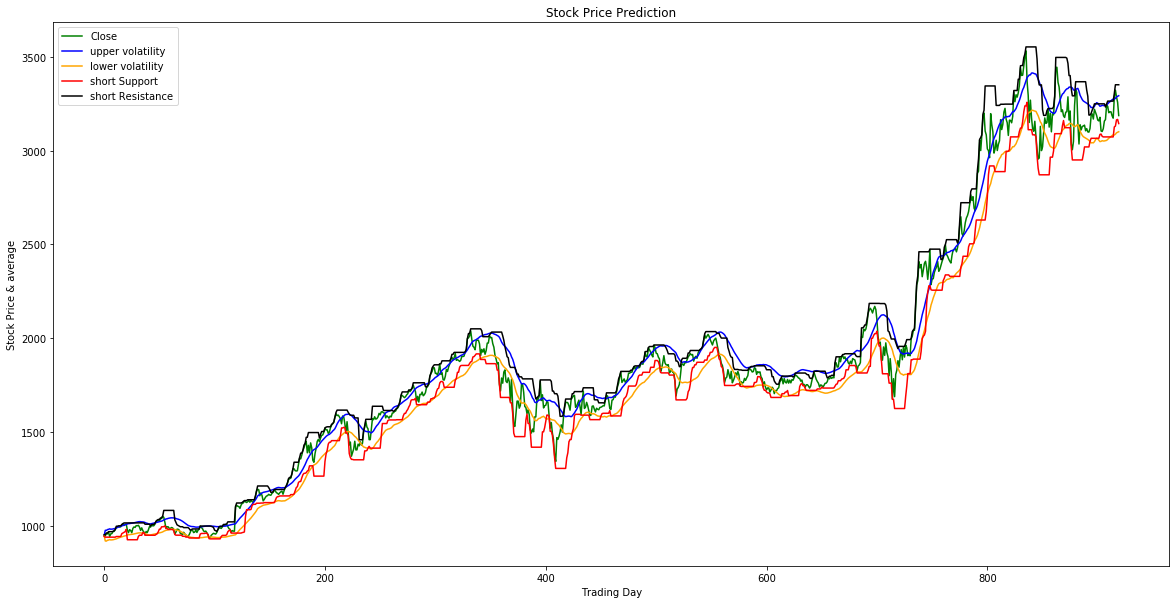

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
#plt.plot(list(df_target.iloc[:]['Moving_av']), color = 'red', label = 'average')
plt.plot(list(df_target.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
plt.plot(list(df_target.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
plt.plot(list(df_target.iloc[:]['Short_support']), color = 'red', label = 'short Support')
plt.plot(list(df_target.iloc[:]['Short_resistance']), color = 'black', label = 'short Resistance')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & average')
plt.legend()
plt.show()

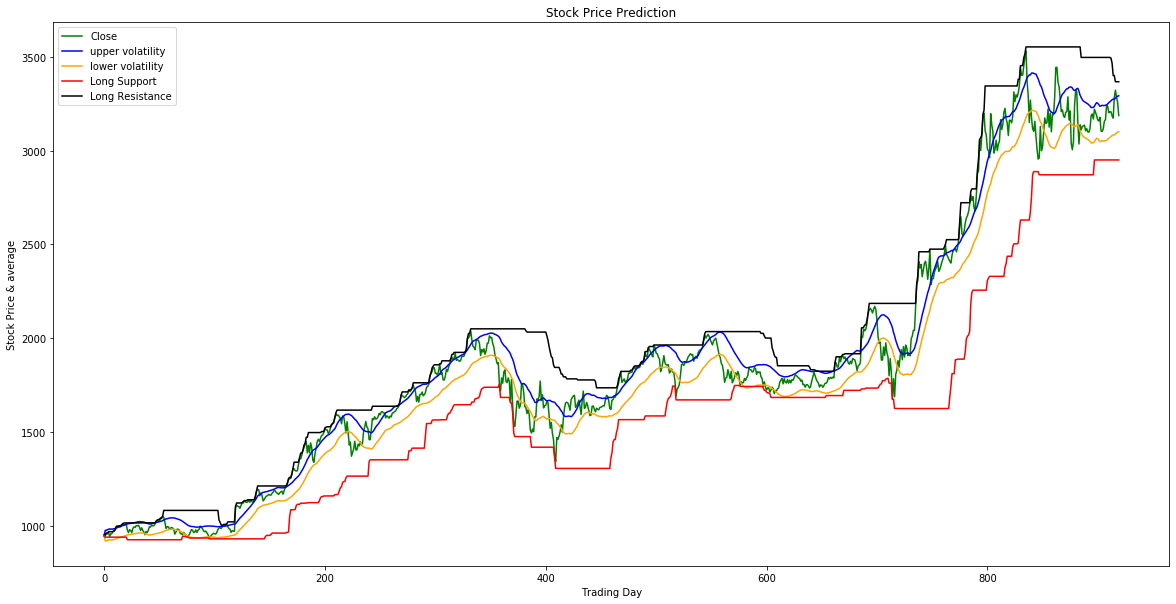

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
#plt.plot(list(df_target.iloc[:]['Moving_av']), color = 'red', label = 'average')
plt.plot(list(df_target.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
plt.plot(list(df_target.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
plt.plot(list(df_target.iloc[:]['Long_support']), color = 'red', label = 'Long Support')
plt.plot(list(df_target.iloc[:]['Long_resistance']), color = 'black', label = 'Long Resistance')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & average')
plt.legend()
plt.show()

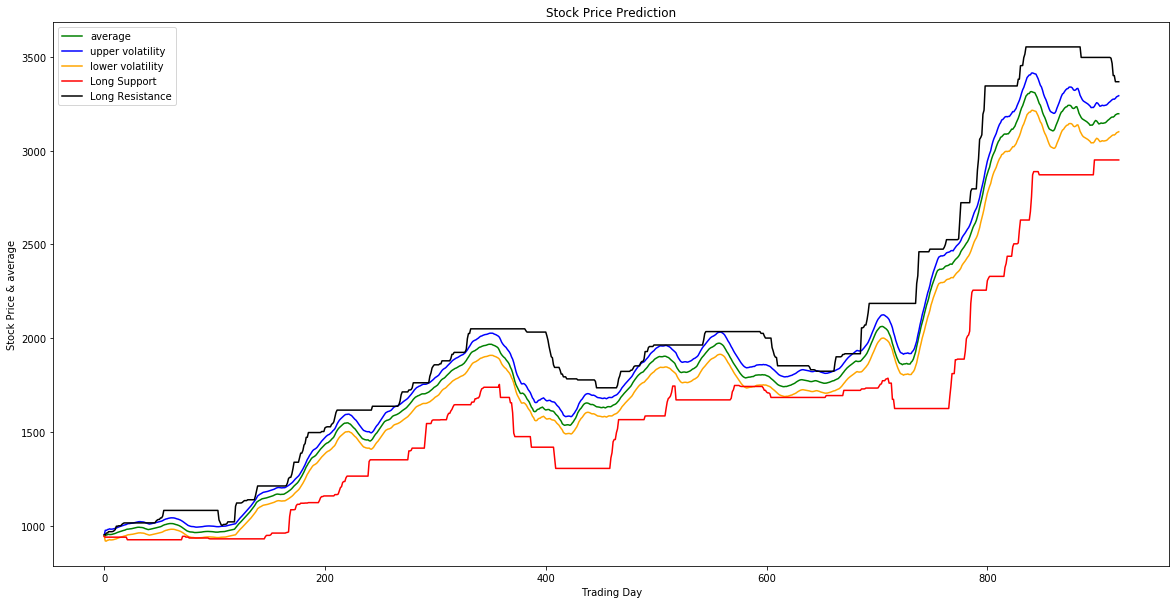

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
plt.plot(list(df_target.iloc[:]['Moving_av']), color = 'green', label = 'average')
plt.plot(list(df_target.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
plt.plot(list(df_target.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
plt.plot(list(df_target.iloc[:]['Long_support']), color = 'red', label = 'Long Support')
plt.plot(list(df_target.iloc[:]['Long_resistance']), color = 'black', label = 'Long Resistance')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & average')
plt.legend()
plt.show()

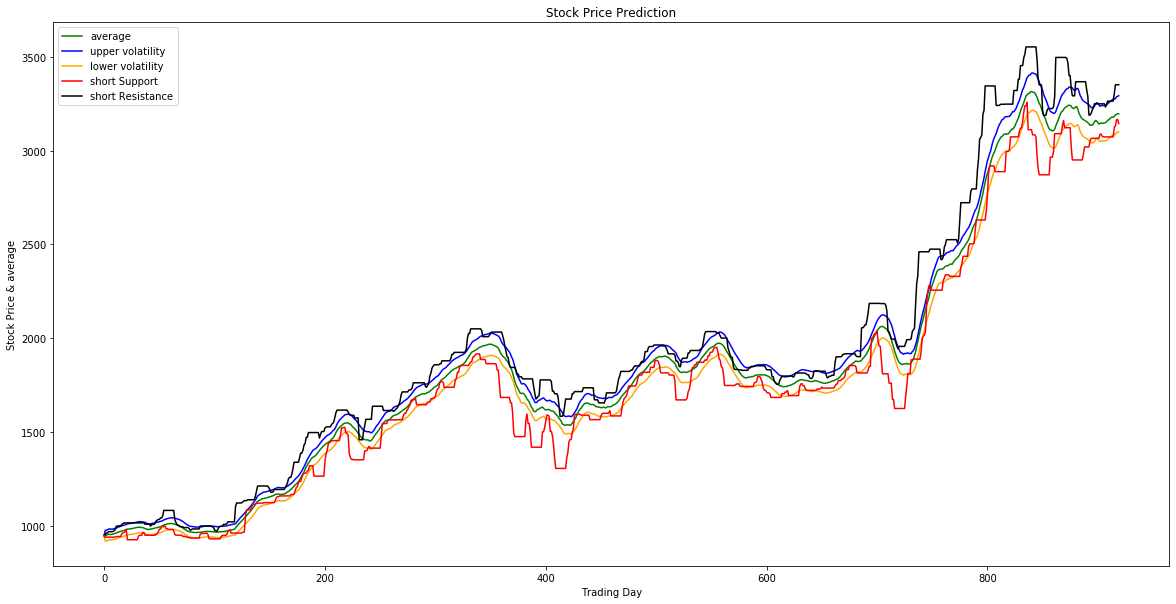

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
plt.plot(list(df_target.iloc[:]['Moving_av']), color = 'green', label = 'average')
plt.plot(list(df_target.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
plt.plot(list(df_target.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
plt.plot(list(df_target.iloc[:]['Short_support']), color = 'red', label = 'short Support')
plt.plot(list(df_target.iloc[:]['Short_resistance']), color = 'black', label = 'short Resistance')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & average')
plt.legend()
plt.show()

### Adding Trends

In [20]:
df_target.to_csv('dataset_prepared.csv', index=False)

In [1]:
import pandas as pd

In [73]:
df_main=pd.read_csv('dataset_prepared.csv')

In [74]:
df_main.head()

Date        High         Low        Open       Close   Volume  \
0  2017-05-10  953.750000  945.000000  953.500000  948.950012  2096500   
1  2017-05-11  950.289978  940.780029  945.109985  947.619995  2194100   
2  2017-05-12  962.789978  951.530029  954.500000  961.349976  3625900   
3  2017-05-15  963.150024  956.059998  958.729980  957.969971  4270600   
4  2017-05-16  970.059998  960.909973  961.000000  966.070007  3126100   

    Adj Close   Moving_av  Upper_volatility  Lower_volatility  \
0  948.950012  948.950012        948.950012        948.950012   
1  947.619995  948.285004        977.418513        920.481512   
2  961.349976  952.639994        976.733554        919.836454   
3  957.969971  953.972488        981.219194        924.060794   
4  966.070007  956.391992        982.591663        925.353314   

   Short_resistance  Short_support  Long_resistance  Long_support  
0        953.750000     945.000000       953.750000    945.000000  
1        953.750000     940.780029       953.750000    940.780029  
2        962.789978     940.780029       962.789978    940.780029  
3        963.150024     940.780029       963.150024    940.780029  
4        970.059998     940.780029       970.059998    940.780029

In [7]:
df_trends=pd.read_csv('amazon_trends.csv')

In [8]:
df_trends.head()

Week  Amazon.com: (Worldwide)
0  2016-01-10                       50
1  2016-01-17                       52
2  2016-01-24                       50
3  2016-01-31                       48
4  2016-02-07                       48

In [9]:
import datetime 

In [12]:
dates=[]
i=0
while i<len(df_trends):
    dates.append(datetime.date(int(df_trends.iloc[i]['Week'].split('-')[0]),int(df_trends.iloc[i]['Week'].split('-')[1]),int(df_trends.iloc[i]['Week'].split('-')[2])))
    i+=1

    

In [13]:
df_trends['date']=dates

In [17]:
df_trends_req=df_trends[df_trends['date']>datetime.date(2017,5,5)]

In [18]:
df_trends_req.head()

Week  Amazon.com: (Worldwide)        date
69  2017-05-07                       59  2017-05-07
70  2017-05-14                       55  2017-05-14
71  2017-05-21                       54  2017-05-21
72  2017-05-28                       55  2017-05-28
73  2017-06-04                       55  2017-06-04

In [65]:
days=[]
trend=[]

In [66]:
i=0
while i<len(df_trends_req):
    day=df_trends_req.iloc[i]['date']
    #trend.append(df_trends_req.iloc[i]['Amazon.com: (Worldwide)'])
    dates=[dates for dates in (day - datetime.timedelta(n) for n in range(7))]
    
    dates.reverse()
    #print(dates)
    j=0
    while j<len(dates):
        print(dates[j])
        days.append(dates[j])
        trend.append(df_trends_req.iloc[i]['Amazon.com: (Worldwide)'])
        j+=1
    i+=1

2017-05-01
2017-05-02
2017-05-03
2017-05-04
2017-05-05
2017-05-06
2017-05-07
2017-05-08
2017-05-09
2017-05-10
2017-05-11
2017-05-12
2017-05-13
2017-05-14
2017-05-15
2017-05-16
2017-05-17
2017-05-18
2017-05-19
2017-05-20
2017-05-21
2017-05-22
2017-05-23
2017-05-24
2017-05-25
2017-05-26
2017-05-27
2017-05-28
2017-05-29
2017-05-30
2017-05-31
2017-06-01
2017-06-02
2017-06-03
2017-06-04
2017-06-05
2017-06-06
2017-06-07
2017-06-08
2017-06-09
2017-06-10
2017-06-11
2017-06-12
2017-06-13
2017-06-14
2017-06-15
2017-06-16
2017-06-17
2017-06-18
2017-06-19
2017-06-20
2017-06-21
2017-06-22
2017-06-23
2017-06-24
2017-06-25
2017-06-26
2017-06-27
2017-06-28
2017-06-29
2017-06-30
2017-07-01
2017-07-02
2017-07-03
2017-07-04
2017-07-05
2017-07-06
2017-07-07
2017-07-08
2017-07-09
2017-07-10
2017-07-11
2017-07-12
2017-07-13
2017-07-14
2017-07-15
2017-07-16
2017-07-17
2017-07-18
2017-07-19
2017-07-20
2017-07-21
2017-07-22
2017-07-23
2017-07-24
2017-07-25
2017-07-26
2017-07-27
2017-07-28
2017-07-29
2017-07-30

2020-11-11
2020-11-12
2020-11-13
2020-11-14
2020-11-15
2020-11-16
2020-11-17
2020-11-18
2020-11-19
2020-11-20
2020-11-21
2020-11-22
2020-11-23
2020-11-24
2020-11-25
2020-11-26
2020-11-27
2020-11-28
2020-11-29
2020-11-30
2020-12-01
2020-12-02
2020-12-03
2020-12-04
2020-12-05
2020-12-06
2020-12-07
2020-12-08
2020-12-09
2020-12-10
2020-12-11
2020-12-12
2020-12-13
2020-12-14
2020-12-15
2020-12-16
2020-12-17
2020-12-18
2020-12-19
2020-12-20
2020-12-21
2020-12-22
2020-12-23
2020-12-24
2020-12-25
2020-12-26
2020-12-27
2020-12-28
2020-12-29
2020-12-30
2020-12-31
2021-01-01
2021-01-02
2021-01-03


In [67]:
df_trend_final=pd.DataFrame(list(zip(days,trend)), columns=['Date','trend_hit'])

In [68]:
df_trend_final.head()

Date  trend_hit
0  2017-05-01         59
1  2017-05-02         59
2  2017-05-03         59
3  2017-05-04         59
4  2017-05-05         59

In [70]:
df_trend_final.to_csv('Trends_preprocessed.csv',index=False)

In [75]:
df_trend_final=pd.read_csv('Trends_preprocessed.csv')

In [76]:
df_trend_final.head()

Date  trend_hit
0  2017-05-01         59
1  2017-05-02         59
2  2017-05-03         59
3  2017-05-04         59
4  2017-05-05         59

In [79]:
len(df_main)

920

In [85]:
df_2=pd.merge(df_main,df_trend_final,how="inner",on="Date")

In [88]:
df_2.tail()

Date         High          Low         Open        Close   Volume  \
914  2020-12-24  3202.000000  3169.000000  3193.899902  3172.689941  1451900   
915  2020-12-28  3304.000000  3172.689941  3194.000000  3283.959961  5686800   
916  2020-12-29  3350.649902  3281.219971  3309.939941  3322.000000  4872900   
917  2020-12-30  3342.100098  3282.469971  3341.000000  3285.850098  3209300   
918  2020-12-31  3282.919922  3241.199951  3275.000000  3256.929932  2954100   

       Adj Close    Moving_av  Upper_volatility  Lower_volatility  \
914  3172.689941  3178.257007       3274.242294       3083.509733   
915  3283.959961  3182.688000       3273.604717       3082.909297   
916  3322.000000  3190.385999       3278.168641       3087.207360   
917  3285.850098  3193.674500       3286.097578       3094.674419   
918  3256.929932  3196.344495       3289.484734       3097.864265   

     Short_resistance  Short_support  Long_resistance  Long_support  trend_hit  
914       3263.510010    3072.820068      3399.659912   2950.120117         85  
915       3304.000000    3126.000000      3399.659912   2950.120117         88  
916       3350.649902    3130.489990      3366.800049   2950.120117         88  
917       3350.649902    3163.679932      3366.800049   2950.120117         88  
918       3350.649902    3166.000000      3366.800049   2950.120117         88

### Adding Indicators

In [89]:
df_dj=pd.read_csv('dow_jones.csv')
df_sp=pd.read_csv('sp500.csv')

In [90]:
df_dj_n_sp=pd.merge(df_dj,df_sp,how="inner",on="date")

In [96]:
df_dj_n_sp.head()

date   value_x   value_y
0  2008-01-07  12827.49   1416.18
1  2008-01-08  12589.07   1390.19
2  2008-01-09  12735.31   1409.13
3  2008-01-10  12853.09   1420.33
4  2008-01-11  12606.30   1401.02

In [106]:
df_dj_n_sp.columns=['Date','Dow_jones','snp500']

In [107]:
df_dj_n_sp.head()

Date  Dow_jones   snp500
0  2008-01-07   12827.49  1416.18
1  2008-01-08   12589.07  1390.19
2  2008-01-09   12735.31  1409.13
3  2008-01-10   12853.09  1420.33
4  2008-01-11   12606.30  1401.02

In [108]:
df_3=pd.merge(df_2,df_dj_n_sp,how="inner",on="Date")

In [109]:
len(df_3)

917

In [111]:
df_3.tail()

Date         High          Low         Open        Close   Volume  \
912  2020-12-24  3202.000000  3169.000000  3193.899902  3172.689941  1451900   
913  2020-12-28  3304.000000  3172.689941  3194.000000  3283.959961  5686800   
914  2020-12-29  3350.649902  3281.219971  3309.939941  3322.000000  4872900   
915  2020-12-30  3342.100098  3282.469971  3341.000000  3285.850098  3209300   
916  2020-12-31  3282.919922  3241.199951  3275.000000  3256.929932  2954100   

       Adj Close    Moving_av  Upper_volatility  Lower_volatility  \
912  3172.689941  3178.257007       3274.242294       3083.509733   
913  3283.959961  3182.688000       3273.604717       3082.909297   
914  3322.000000  3190.385999       3278.168641       3087.207360   
915  3285.850098  3193.674500       3286.097578       3094.674419   
916  3256.929932  3196.344495       3289.484734       3097.864265   

     Short_resistance  Short_support  Long_resistance  Long_support  \
912       3263.510010    3072.820068      3399.659912   2950.120117   
913       3304.000000    3126.000000      3399.659912   2950.120117   
914       3350.649902    3130.489990      3366.800049   2950.120117   
915       3350.649902    3163.679932      3366.800049   2950.120117   
916       3350.649902    3166.000000      3366.800049   2950.120117   

     trend_hit  Dow_jones   snp500  
912         85   30199.87  3703.06  
913         88   30403.97  3735.36  
914         88   30335.67  3727.04  
915         88   30409.56  3732.04  
916         88   30606.48  3756.07

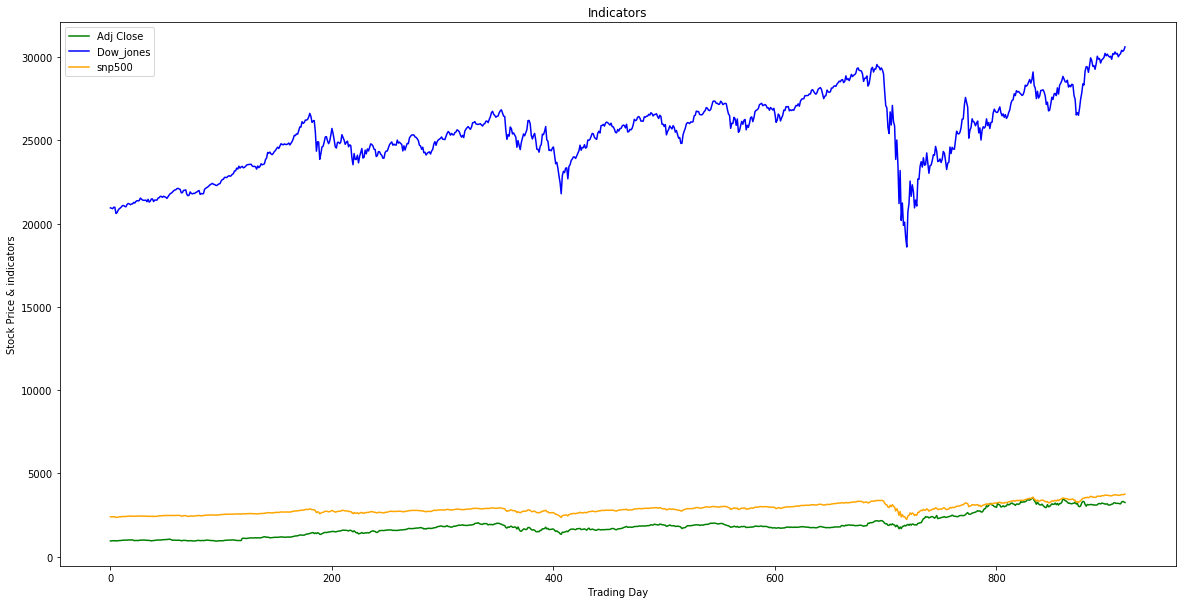

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
plt.plot(list(df_3.iloc[:]['Adj Close']), color = 'green', label = 'Adj Close')
plt.plot(list(df_3.iloc[:]['Dow_jones']), color = 'blue', label = 'Dow_jones')
plt.plot(list(df_3.iloc[:]['snp500']), color = 'orange', label = 'snp500')

plt.title('Indicators')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & indicators')
plt.legend()
plt.show()

In [116]:
df_3.to_csv('Without_News.csv',index=False)

In [117]:
import os

In [119]:
fldr="Relevant/"

In [120]:
files=os.listdir(fldr)

In [124]:
tickers=[file[:-4] for file in files]

In [125]:
tickers

['BF-B', 'CTAS', 'CPRT', 'AJG', 'HUM', 'MKTX', 'INFO', 'CHD', 'A', 'APD']

In [126]:
df_temp=pd.read_csv('Dataset_temp.csv')

In [127]:
df_temp.head()

Date         MMM        ABT       ABBV        ABMD         ACN  \
0  2017-05-10  175.699173  41.881226  55.240952  131.800003  114.601151   
1  2017-05-11  175.797485  41.278885  54.671627  130.850006  114.222931   
2  2017-05-12  175.636658  41.373005  55.307930  131.419998  114.374214   
3  2017-05-15  176.583740  41.448299  55.818645  134.509995  115.593979   
4  2017-05-16  176.833923  41.118893  55.969349  133.839996  116.435524   

        ATVI        ADBE    AMD         AAP  ...        LKQ         LMT  \
0  54.897884  136.149994  10.79  144.070404  ...  31.290001  247.154053   
1  54.662563  136.289993  11.07  143.863419  ...  31.030001  247.472382   
2  54.917488  136.839996  11.26  142.946701  ...  31.020000  246.717529   
3  55.309689  137.600006  11.42  143.764847  ...  31.170000  247.708847   
4  55.672474  138.029999  12.75  143.173416  ...  30.980000  247.072220   

           L        LOW  LUMN        LYB         MTB        MRO        MPC  \
0  45.510078  80.547012   NaN  57.198570  144.563919  14.033338  45.465927   
1  44.981003  79.274139   NaN  56.858688  143.774384  13.823316  45.613598   
2  44.834045  79.386459   NaN  56.213581  143.211716  13.680119  45.752579   
3  45.137772  79.732773   NaN  57.247128  145.689209  13.929198  46.347340   
4  45.441502  79.891861   NaN  57.614758  147.349945  13.823819  45.901272   

         MKTX  
0  183.680359  
1  183.846283  
2  181.952484  
3  183.904877  
4  180.322250  

[5 rows x 301 columns]

In [128]:
tickers.insert(0,'Date')

In [129]:
tickers

['Date',
 'BF-B',
 'CTAS',
 'CPRT',
 'AJG',
 'HUM',
 'MKTX',
 'INFO',
 'CHD',
 'A',
 'APD']

In [130]:
df_tickers=df_temp[tickers]

In [131]:
df_tickers.head()

Date       BF-B        CTAS       CPRT        AJG         HUM  \
0  2017-05-10  36.706463  116.400665  30.170000  50.906693  224.781387   
1  2017-05-11  36.974762  117.455017  29.920000  50.585552  224.713196   
2  2017-05-12  36.669197  117.224976  29.889999  50.218517  225.940338   
3  2017-05-15  36.870426  117.292068  29.980000  50.640598  225.083313   
4  2017-05-16  37.608280  117.483765  29.969999  50.750713  220.301315   

         MKTX       INFO        CHD          A         APD  
0  183.680359  43.055977  48.258198  54.481506  132.025391  
1  183.846283  43.055977  48.068459  54.442787  130.761948  
2  181.952484  42.818104  47.801838  54.375004  130.952820  
3  183.904877  43.343414  47.849445  54.897842  131.870834  
4  180.322250  43.472267  47.116230  55.023720  131.207336

In [132]:
df_4=pd.merge(df_3,df_tickers,how="inner",on="Date")

In [133]:
len(df_4)

917

In [146]:
df_4.tail()

Date         High          Low         Open        Close   Volume  \
912  2020-12-24  3202.000000  3169.000000  3193.899902  3172.689941  1451900   
913  2020-12-28  3304.000000  3172.689941  3194.000000  3283.959961  5686800   
914  2020-12-29  3350.649902  3281.219971  3309.939941  3322.000000  4872900   
915  2020-12-30  3342.100098  3282.469971  3341.000000  3285.850098  3209300   
916  2020-12-31  3282.919922  3241.199951  3275.000000  3256.929932  2954100   

       Adj Close    Moving_av  Upper_volatility  Lower_volatility  ...  \
912  3172.689941  3178.257007       3274.242294       3083.509733  ...   
913  3283.959961  3182.688000       3273.604717       3082.909297  ...   
914  3322.000000  3190.385999       3278.168641       3087.207360  ...   
915  3285.850098  3193.674500       3286.097578       3094.674419  ...   
916  3256.929932  3196.344495       3289.484734       3097.864265  ...   

          BF-B        CTAS        CPRT         AJG         HUM        MKTX  \
912  78.029999  338.399994  123.709999  123.419998  404.209930  573.080017   
913  78.349998  354.190002  126.720001  123.029999  409.561737  565.770020   
914  78.940002  347.369995  125.919998  121.529999  407.424988  564.789978   
915  78.680000  350.230011  126.540001  121.699997  406.109985  562.270020   
916  79.430000  353.459991  127.250000  123.709999  410.269989  570.559998   

          INFO        CHD           A         APD  
912  86.370003  86.860001  117.117928  267.023590  
913  86.940002  87.480003  117.637077  267.272369  
914  88.029999  87.080002  117.038063  267.401733  
915  88.519997  86.709999  117.197800  269.760010  
916  89.830002  87.230003  118.295998  273.220001  

[5 rows x 27 columns]

In [139]:
df_4.to_csv('included_tickers.csv',index=False)

### Adding News

In [144]:
df_news=pd.read_excel('News_articles_2.xlsx')

In [145]:
df_news

News
0     Amazon Signals Shift In 2021 Focus Following P...
1     Editors' PickThe Entertainment OracleTue, Dec....
2                               Amazon: How Amazon Wins
3           John M. MasonSun, Dec. 27, 2020118 Comments
4     Amazon - How I Handle This Company As A DGR In...
5              Wolf ReportWed, Dec. 23, 202027 Comments
6     Amazon Fresh Stores Are Going After Aldi, Not ...
7     Editors' PickThe Battle Of GiantsWed, Dec. 16,...
8        Why A $4,000 Price Tag For Amazon Is Realistic
9                   BK TanMon, Dec. 14, 202059 Comments
10    Amazon: A $4000/Share Price Is Just Around The...
11      Nikolaos SismanisMon, Dec. 14, 2020145 Comments
12    Amazon: Due For A Breakout As The Stock Trails...
13        Steven FiorilloTue, Dec. 08, 2020288 Comments
14    Amazon Set To Play Major Role As NFL Looks Tow...
15    Editors' PickThe Entertainment OracleWed, Dec....
16          Holiday Season Should Prove Amazon A Winner
17     DM Martins ResearchMon, Nov. 30, 202054 Comments
18    Amazon: Taking Market Share In Digital Adverti...
19        Trevor JennewineMon, Nov. 23, 202027 Comments
20    Amazon's Overvalued Stock Has Significant Down...
21    Mott Capital ManagementMon, Nov. 16, 2020240 C...
22    Amazon Halo Is A $1.5B+ Opportunity To Help Ba...
23    The Battle Of GiantsFri, Nov. 13, 202015 Comments
24    Amazon: At Least Not Overvalued (3 Types Of Va...
25           Oleh KombaievTue, Nov. 10, 202078 Comments
26    Amazon: Q3 2020 Results, Advertising Opportuni...
27    Michael Wiggins De OliveiraTue, Nov. 03, 20203...
28                     Amazon Train Keeps Rolling Along
29             Bill MaurerMon, Nov. 02, 202058 Comments
...                                                 ...
1722          Demystifying The Amazon Valuation Dilemma
1723       Chuck CarnevaleWed, May 24, 2017221 Comments
1724  Amazon's Phenomenal Rise In Market Value: The ...
1725          Mark J. PerryTue, May 23, 201745 Comments
1726  Amazon Prime Video: Downloads Are Bigger Than ...
1727              Max GreveTue, May 23, 201716 Comments
1728                    Amazon: The Emporia Strike Back
1729                DoctoRxMon, May 22, 201777 Comments
1730            Will Amazon Retain Its Cloud Supremacy?
1731     Shareholders UniteSun, May 21, 201738 Comments
1732  Amazon Isn't Just Busting Retail, It's Busting...
1733     Shareholders UniteThu, May 18, 201790 Comments
1734  Amazon's Next Big Thing Could Be A $25 Billion...
1735        Gary BourgeaultWed, May 17, 201741 Comments
1736  Amazon.com: A Share Price Limited Only By Imag...
1737       Robert HoneywillWed, May 17, 201751 Comments
1738   Retail Is Dead For Sure, A Cherry-Picked Example
1739          Paulo SantosWed, May 17, 2017101 Comments
1740                 Whole Foods - Nothing Good To Come
1741  Editors' PickJamie KrasnovWed, May 17, 201722 ...
1742     AWS Will Take Amazon's Stock Price Past $1,000
1743        Michael A. BallMon, May 15, 201726 Comments
1744        Amazon Web Services: $190 Billion Valuation
1745  Editors' PickSIC Investment Research Inc.Mon, ...
1746              Whole Foods Is Irrationally Exuberant
1747          Harshal PatelMon, May 15, 201719 Comments
1748  Amazon Fire Is Cooling Off, And It May Threate...
1749              Max GreveFri, May 12, 201758 Comments
1750                           Whole Foods: Flaws Mount
1751      Stone Fox CapitalThu, May 11, 201713 Comments

[1752 rows x 1 columns]

In [156]:
months=['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.']
i=0
news=[]
date=[]
while i<len(df_news):
    if i%2==0:
        news.append(df_news.iloc[i]['News'])
    else:
        words=df_news.iloc[i]['News'].split(' ')
        for word in words:
            if word in months:
                month=months.index(word)+1
                
            if word[:-1].isnumeric():
                if int(word[:-1])<32:
                    day=int(word[:-1])
                else:
                    year=int(word[:4])
        #print(str(day)+'/'+str(month)+'/'+str(year))
        day_n=datetime.date(year,month,day)
        date.append(day_n)
    i+=1

In [157]:
df_news=pd.DataFrame(list(zip(news,date)),columns=['News','Date'])

In [158]:
df_news.head()

News        Date
0  Amazon Signals Shift In 2021 Focus Following P...  2020-12-29
1                            Amazon: How Amazon Wins  2020-12-27
2  Amazon - How I Handle This Company As A DGR In...  2020-12-23
3  Amazon Fresh Stores Are Going After Aldi, Not ...  2020-12-16
4     Why A $4,000 Price Tag For Amazon Is Realistic  2020-12-14

In [160]:
df_news=df_news.sort_values(by=['Date'])

In [161]:
df_news.head()

News        Date
875                           Whole Foods: Flaws Mount  2017-05-11
874  Amazon Fire Is Cooling Off, And It May Threate...  2017-05-12
872        Amazon Web Services: $190 Billion Valuation  2017-05-15
873              Whole Foods Is Irrationally Exuberant  2017-05-15
871     AWS Will Take Amazon's Stock Price Past $1,000  2017-05-15

In [162]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/lib/python3/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [163]:
analyzer = SentimentIntensityAnalyzer()

In [165]:
scores=df_news['News'].apply(analyzer.polarity_scores).tolist()

In [167]:
scores_df=pd.DataFrame(scores)

In [168]:
scores_df.head()

compound    neg    neu    pos
0    0.0000  0.000  1.000  0.000
1   -0.1779  0.307  0.429  0.264
2    0.1779  0.000  0.746  0.254
3    0.2960  0.277  0.319  0.404
4    0.0000  0.000  1.000  0.000

In [169]:
df_news_final=pd.concat([df_news,scores_df],axis=1)

In [170]:
df_news_final

News        Date  compound  \
0    Amazon Signals Shift In 2021 Focus Following P...  2020-12-29    0.0000   
1                              Amazon: How Amazon Wins  2020-12-27   -0.1779   
2    Amazon - How I Handle This Company As A DGR In...  2020-12-23    0.1779   
3    Amazon Fresh Stores Are Going After Aldi, Not ...  2020-12-16    0.2960   
4       Why A $4,000 Price Tag For Amazon Is Realistic  2020-12-14    0.0000   
5    Amazon: A $4000/Share Price Is Just Around The...  2020-12-14    0.4215   
6    Amazon: Due For A Breakout As The Stock Trails...  2020-12-08   -0.3412   
7    Amazon Set To Play Major Role As NFL Looks Tow...  2020-12-02   -0.4588   
8          Holiday Season Should Prove Amazon A Winner  2020-11-30    0.0772   
9    Amazon: Taking Market Share In Digital Adverti...  2020-11-23    0.1779   
10   Amazon's Overvalued Stock Has Significant Down...  2020-11-16    0.2263   
11   Amazon Halo Is A $1.5B+ Opportunity To Help Ba...  2020-11-13    0.0516   
12   Amazon: At Least Not Overvalued (3 Types Of Va...  2020-11-10    0.1779   
13   Amazon: Q3 2020 Results, Advertising Opportuni...  2020-11-03    0.9359   
14                    Amazon Train Keeps Rolling Along  2020-11-02    0.0000   
15                     Amazon: Same Old Song And Dance  2020-10-29   -0.5267   
16             Amazon: The Never-Ending Growth Machine  2020-10-29    0.0000   
17                        Amazon: The Coming Graviton3  2020-10-29   -0.3818   
18   Amazon Preview: Probably The Best Big Tech Rep...  2020-10-29    0.1779   
19   Massive Opportunity In 'Digital Transformation...  2020-10-22    0.0000   
20   Massive Opportunity In 'Digital Transformation...  2020-10-20   -0.5267   
21        Amazon Is Back On A Strong Price Return Path  2020-10-14    0.6486   
22   Amazon's 'October Surprise' Sends Warning To R...  2020-10-14    0.1779   
23                          3 Reasons Why I Own Amazon  2020-10-06    0.1779   
24   Amazon's Luna Vs. Google's Stadia: The Former ...  2020-09-28    0.1779   
25            Amazon: The Significance Of 'Gadget Day'  2020-09-28    0.1779   
26                  Amazon: The Pause Before The Storm  2020-09-15   -0.0041   
27                     Amazon: This Indicator Says Buy  2020-09-14    0.0000   
28   Amazon's Next Potential Game Changer: Drone De...  2020-09-13    0.1779   
29              Amazon's Profits, AWS, And Advertising  2020-09-08    0.1280   
..                                                 ...         ...       ...   
846                       Forget About Value Investing  2017-06-07    0.4404   
847            How Long Can Amazon Keep Outperforming?  2017-06-07    0.0000   
848               The Extent Of Amazon's Overvaluation  2017-06-07    0.1779   
849  Don't Be Too Upset About Missing Out On Amazon...  2017-06-07    0.1779   
850  When Valuation Prevails: Where Does Amazon Go ...  2017-06-06    0.4215   
851                          Amazon Smartphones, Again  2017-06-06    0.4955   
852                             Is Amazon Still A Buy?  2017-06-06    0.1779   
853                   Amazon Has Formed Its Own Bubble  2017-06-05   -0.0772   
854              Whole Foods: No Buyout, No Buy Rating  2017-06-01    0.6124   
855  The Euphoria Debate: U.S. Stocks Vs. U.S. Real...  2017-06-01    0.4215   
856  The Whole Foods Turnaround Plan Lacks Credibility  2017-05-31    0.4215   
857                               Amazon: Expectations  2017-05-31    0.7096   
858    Amazon: Low-Hanging Fruit Or Rotten Vegetables?  2017-05-30    0.1779   
859  Is Amazon's Head Start With Alexa, Echo Enough...  2017-05-28    0.5106   
860                      Amazon.com: Danger In Numbers  2017-05-26    0.1779   
861          Demystifying The Amazon Valuation Dilemma  2017-05-24    0.1779   
862  Amazon's Phenomenal Rise In Market Value: The ...  2017-05-23    0.5423   
863  Amazon Prime Video: Downloads Are Bigger Than ...  2017-05-23    0.1779   
864                    Amazon: The Emporia Strike 

In [171]:
df_news_final=df_news_final.drop(['News'],axis=1)

In [172]:
df_news_final

Date  compound    neg    neu    pos
0    2020-12-29    0.0000  0.000  1.000  0.000
1    2020-12-27   -0.1779  0.307  0.429  0.264
2    2020-12-23    0.1779  0.000  0.746  0.254
3    2020-12-16    0.2960  0.277  0.319  0.404
4    2020-12-14    0.0000  0.000  1.000  0.000
5    2020-12-14    0.4215  0.000  0.741  0.259
6    2020-12-08   -0.3412  0.325  0.675  0.000
7    2020-12-02   -0.4588  0.371  0.431  0.198
8    2020-11-30    0.0772  0.209  0.549  0.242
9    2020-11-23    0.1779  0.000  0.805  0.195
10   2020-11-16    0.2263  0.000  0.580  0.420
11   2020-11-13    0.0516  0.242  0.484  0.274
12   2020-11-10    0.1779  0.000  0.825  0.175
13   2020-11-03    0.9359  0.000  0.440  0.560
14   2020-11-02    0.0000  0.266  0.469  0.266
15   2020-10-29   -0.5267  0.531  0.469  0.000
16   2020-10-29    0.0000  0.000  1.000  0.000
17   2020-10-29   -0.3818  0.367  0.444  0.189
18   2020-10-29    0.1779  0.000  0.370  0.630
19   2020-10-22    0.0000  0.000  1.000  0.000
20   2020-10-20   -0.5267  0.468  0.532  0.000
21   2020-10-14    0.6486  0.000  0.650  0.350
22   2020-10-14    0.1779  0.000  0.746  0.254
23   2020-10-06    0.1779  0.000  0.638  0.362
24   2020-09-28    0.1779  0.000  0.541  0.459
25   2020-09-28    0.1779  0.000  0.825  0.175
26   2020-09-15   -0.0041  0.193  0.615  0.192
27   2020-09-14    0.0000  0.000  1.000  0.000
28   2020-09-13    0.1779  0.000  0.746  0.254
29   2020-09-08    0.1280  0.302  0.317  0.381
..          ...       ...    ...    ...    ...
846  2017-06-07    0.4404  0.000  0.580  0.420
847  2017-06-07    0.0000  0.000  1.000  0.000
848  2017-06-07    0.1779  0.000  0.702  0.298
849  2017-06-07    0.1779  0.000  0.746  0.254
850  2017-06-06    0.4215  0.000  0.513  0.487
851  2017-06-06    0.4955  0.082  0.697  0.222
852  2017-06-06    0.1779  0.000  0.638  0.362
853  2017-06-05   -0.0772  0.229  0.571  0.200
854  2017-06-01    0.6124  0.000  0.545  0.455
855  2017-06-01    0.4215  0.000  0.763  0.237
856  2017-05-31    0.4215  0.000  0.797  0.203
857  2017-05-31    0.7096  0.000  0.576  0.424
858  2017-05-30    0.1779  0.000  0.638  0.362
859  2017-05-28    0.5106  0.000  0.411  0.589
860  2017-05-26    0.1779  0.000  0.746  0.254
861  2017-05-24    0.1779  0.000  0.702  0.298
862  2017-05-23    0.5423  0.000  0.690  0.310
863  2017-05-23    0.1779  0.000  0.825  0.175
864  2017-05-22    0.7351  0.000  0.556  0.444
865  2017-05-21   -0.3182  0.414  0.404  0.182
866  2017-05-18    0.4404  0.000  0.562  0.438
867  2017-05-17    0.8020  0.000  0.268  0.732
868  2017-05-17    0.4767  0.000  0.709  0.291
869  2017-05-17    0.1779  0.000  0.841  0.159
870  2017-05-17    0.1779  0.000  0.805  0.195
871  2017-05-15    0.1779  0.000  0.805  0.195
872  2017-05-15    0.4588  0.000  0.800  0.200
873  2017-05-15    0.1779  0.000  0.805  0.195
874  2017-05-12    0.7269  0.000  0.123  0.877
875  2017-05-11    0.1779  0.000  0.825  0.175

[876 rows x 5 columns]

In [173]:
mean_scores = df_news_final.groupby(['Date']).mean()

In [174]:
mean_scores

compound       neg       neu       pos
Date                                              
2017-05-11  0.177900  0.000000  0.825000  0.175000
2017-05-12  0.726900  0.000000  0.123000  0.877000
2017-05-15  0.271533  0.000000  0.803333  0.196667
2017-05-17  0.408625  0.000000  0.655750  0.344250
2017-05-18  0.440400  0.000000  0.562000  0.438000
2017-05-21 -0.318200  0.414000  0.404000  0.182000
2017-05-22  0.735100  0.000000  0.556000  0.444000
2017-05-23  0.360100  0.000000  0.757500  0.242500
2017-05-24  0.177900  0.000000  0.702000  0.298000
2017-05-26  0.177900  0.000000  0.746000  0.254000
2017-05-28  0.510600  0.000000  0.411000  0.589000
2017-05-30  0.177900  0.000000  0.638000  0.362000
2017-05-31  0.565550  0.000000  0.686500  0.313500
2017-06-01  0.516950  0.000000  0.654000  0.346000
2017-06-05 -0.077200  0.229000  0.571000  0.200000
2017-06-06  0.364967  0.027333  0.616000  0.357000
2017-06-07  0.199050  0.000000  0.757000  0.243000
2017-06-08  0.542300  0.157000  0.508000  0.335000
2017-06-09  0.088950  0.000000  0.819000  0.181000
2017-06-10 -0.670500  0.220000  0.780000  0.000000
2017-06-12  0.367650  0.000000  0.693500  0.306500
2017-06-13  0.000000  0.000000  1.000000  0.000000
2017-06-14  0.344250  0.000000  0.671500  0.328500
2017-06-15  0.000000  0.000000  1.000000  0.000000
2017-06-16  0.014600  0.096125  0.729250  0.174625
2017-06-17 -0.131250  0.112500  0.820500  0.067000
2017-06-18  0.070925  0.091250  0.684250  0.224500
2017-06-19  0.222245  0.000000  0.772909  0.227091
2017-06-20  0.198278  0.043222  0.696778  0.260000
2017-06-21  0.153875  0.095000  0.622500  0.282500
...              ...       ...       ...       ...
2020-08-09  0.177900  0.000000  0.702000  0.298000
2020-08-10  0.741900  0.000000  0.490000  0.510000
2020-08-19 -0.571250  0.411500  0.500000  0.088500
2020-08-27  0.361200  0.000000  0.737000  0.263000
2020-09-01  0.476700  0.000000  0.594000  0.406000
2020-09-02  0.807400  0.000000  0.491000  0.509000
2020-09-08  0.128000  0.302000  0.317000  0.381000
2020-09-13  0.177900  0.000000  0.746000  0.254000
2020-09-14  0.000000  0.000000  1.000000  0.000000
2020-09-15 -0.004100  0.193000  0.615000  0.192000
2020-09-28  0.177900  0.000000  0.683000  0.317000
2020-10-06  0.177900  0.000000  0.638000  0.362000
2020-10-14  0.413250  0.000000  0.698000  0.302000
2020-10-20 -0.526700  0.468000  0.532000  0.000000
2020-10-22  0.000000  0.000000  1.000000  0.000000
2020-10-29 -0.182650  0.224500  0.570750  0.204750
2020-11-02  0.000000  0.266000  0.469000  0.266000
2020-11-03  0.935900  0.000000  0.440000  0.560000
2020-11-10  0.177900  0.000000  0.825000  0.175000
2020-11-13  0.051600  0.242000  0.484000  0.274000
2020-11-16  0.226300  0.000000  0.580000  0.420000
2020-11-23  0.177900  0.000000  0.805000  0.195000
2020-11-30  0.077200  0.209000  0.549000  0.242000
2020-12-02 -0.458800  0.371000  0.431000  0.198000
2020-12-08 -0.341200  0.325000  0.675000  0.000000
2020-12-14  0.210750  0.000000  0.870500  0.129500
2020-12-16  0.296000  0.277000  0.319000  0.404000
2020-12-23  0.177900  0.000000  0.746000  0.254000
2020-12-27 -0.177900  0.307000  0.429000  0.264000
2020-12-29  0.000000  0.000000  1.000000  0.000000

[538 rows x 4 columns]

In [177]:
mean_scores=mean_scores.reset_index()

In [178]:
mean_scores.head()

Date  compound  neg       neu       pos
0  2017-05-11  0.177900  0.0  0.825000  0.175000
1  2017-05-12  0.726900  0.0  0.123000  0.877000
2  2017-05-15  0.271533  0.0  0.803333  0.196667
3  2017-05-17  0.408625  0.0  0.655750  0.344250
4  2017-05-18  0.440400  0.0  0.562000  0.438000

In [179]:
mean_scores.to_csv('Final_news.csv',index=False)

In [180]:
df_main=pd.read_csv('included_tickers.csv')

In [181]:
df_main.head()

Date        High         Low        Open       Close   Volume  \
0  2017-05-10  953.750000  945.000000  953.500000  948.950012  2096500   
1  2017-05-11  950.289978  940.780029  945.109985  947.619995  2194100   
2  2017-05-12  962.789978  951.530029  954.500000  961.349976  3625900   
3  2017-05-15  963.150024  956.059998  958.729980  957.969971  4270600   
4  2017-05-16  970.059998  960.909973  961.000000  966.070007  3126100   

    Adj Close   Moving_av  Upper_volatility  Lower_volatility  ...       BF-B  \
0  948.950012  948.950012        948.950012        948.950012  ...  36.706463   
1  947.619995  948.285004        977.418513        920.481512  ...  36.974762   
2  961.349976  952.639994        976.733554        919.836454  ...  36.669197   
3  957.969971  953.972488        981.219194        924.060794  ...  36.870426   
4  966.070007  956.391992        982.591663        925.353314  ...  37.608280   

         CTAS       CPRT        AJG         HUM        MKTX       INFO  \
0  116.400665  30.170000  50.906693  224.781387  183.680359  43.055977   
1  117.455017  29.920000  50.585552  224.713196  183.846283  43.055977   
2  117.224976  29.889999  50.218517  225.940338  181.952484  42.818104   
3  117.292068  29.980000  50.640598  225.083313  183.904877  43.343414   
4  117.483765  29.969999  50.750713  220.301315  180.322250  43.472267   

         CHD          A         APD  
0  48.258198  54.481506  132.025391  
1  48.068459  54.442787  130.761948  
2  47.801838  54.375004  130.952820  
3  47.849445  54.897842  131.870834  
4  47.116230  55.023720  131.207336  

[5 rows x 27 columns]

In [182]:
df_news=pd.read_csv('Final_news.csv')

In [183]:
df_news.head()

Date  compound  neg       neu       pos
0  2017-05-11  0.177900  0.0  0.825000  0.175000
1  2017-05-12  0.726900  0.0  0.123000  0.877000
2  2017-05-15  0.271533  0.0  0.803333  0.196667
3  2017-05-17  0.408625  0.0  0.655750  0.344250
4  2017-05-18  0.440400  0.0  0.562000  0.438000

In [185]:
df_5=pd.merge(df_main,df_news,how="left",on="Date")

In [186]:
len(df_5)

917

In [187]:
df_5.head()

Date        High         Low        Open       Close   Volume  \
0  2017-05-10  953.750000  945.000000  953.500000  948.950012  2096500   
1  2017-05-11  950.289978  940.780029  945.109985  947.619995  2194100   
2  2017-05-12  962.789978  951.530029  954.500000  961.349976  3625900   
3  2017-05-15  963.150024  956.059998  958.729980  957.969971  4270600   
4  2017-05-16  970.059998  960.909973  961.000000  966.070007  3126100   

    Adj Close   Moving_av  Upper_volatility  Lower_volatility  ...  \
0  948.950012  948.950012        948.950012        948.950012  ...   
1  947.619995  948.285004        977.418513        920.481512  ...   
2  961.349976  952.639994        976.733554        919.836454  ...   
3  957.969971  953.972488        981.219194        924.060794  ...   
4  966.070007  956.391992        982.591663        925.353314  ...   

          HUM        MKTX       INFO        CHD          A         APD  \
0  224.781387  183.680359  43.055977  48.258198  54.481506  132.025391   
1  224.713196  183.846283  43.055977  48.068459  54.442787  130.761948   
2  225.940338  181.952484  42.818104  47.801838  54.375004  130.952820   
3  225.083313  183.904877  43.343414  47.849445  54.897842  131.870834   
4  220.301315  180.322250  43.472267  47.116230  55.023720  131.207336   

   compound  neg       neu       pos  
0       NaN  NaN       NaN       NaN  
1  0.177900  0.0  0.825000  0.175000  
2  0.726900  0.0  0.123000  0.877000  
3  0.271533  0.0  0.803333  0.196667  
4       NaN  NaN       NaN       NaN  

[5 rows x 31 columns]

In [188]:
df_6=df_5.fillna(0.0)

In [190]:
df_6.head()

Date        High         Low        Open       Close   Volume  \
0  2017-05-10  953.750000  945.000000  953.500000  948.950012  2096500   
1  2017-05-11  950.289978  940.780029  945.109985  947.619995  2194100   
2  2017-05-12  962.789978  951.530029  954.500000  961.349976  3625900   
3  2017-05-15  963.150024  956.059998  958.729980  957.969971  4270600   
4  2017-05-16  970.059998  960.909973  961.000000  966.070007  3126100   

    Adj Close   Moving_av  Upper_volatility  Lower_volatility  ...  \
0  948.950012  948.950012        948.950012        948.950012  ...   
1  947.619995  948.285004        977.418513        920.481512  ...   
2  961.349976  952.639994        976.733554        919.836454  ...   
3  957.969971  953.972488        981.219194        924.060794  ...   
4  966.070007  956.391992        982.591663        925.353314  ...   

          HUM        MKTX       INFO        CHD          A         APD  \
0  224.781387  183.680359  43.055977  48.258198  54.481506  132.025391   
1  224.713196  183.846283  43.055977  48.068459  54.442787  130.761948   
2  225.940338  181.952484  42.818104  47.801838  54.375004  130.952820   
3  225.083313  183.904877  43.343414  47.849445  54.897842  131.870834   
4  220.301315  180.322250  43.472267  47.116230  55.023720  131.207336   

   compound  neg       neu       pos  
0  0.000000  0.0  0.000000  0.000000  
1  0.177900  0.0  0.825000  0.175000  
2  0.726900  0.0  0.123000  0.877000  
3  0.271533  0.0  0.803333  0.196667  
4  0.000000  0.0  0.000000  0.000000  

[5 rows x 31 columns]

In [191]:
df_6.to_csv('Final_preprocessed.csv',index=False)

In [213]:
import pandas as pd
df_main=pd.read_csv('Final_preprocessed.csv')

In [214]:
len(df_main.columns)

31

### RNN_data Handling

In [217]:
RNN_data_cols=['High','Low','Open','Close','Volume','Adj Close','Moving_av']

In [218]:
Regression_data_cols=['Upper_volatility','Lower_volatility','Short_resistance','Short_support','Long_resistance','Long_support','trend_hit','Dow_jones','snp500','compound','neg','neu','pos','BF-B','CTAS','CPRT','AJG','HUM','MKTX','INFO','CHD','A','APD']

In [219]:
len(RNN_data_cols)

7

In [220]:
RNN_data=df_main[RNN_data_cols]
Regression_data=df_main[Regression_data_cols]

In [221]:
### Modelling

In [222]:
Target_column=['Adj Close']

In [223]:
df_target=df_main[Target_column]

In [224]:
df_target_n=df_main[Target_column].values

In [225]:
RNN_data_n=df_main[RNN_data_cols].values

In [226]:
RNN_data_n.shape

(917, 7)

In [227]:
Regression_data=df_main[Regression_data_cols].values

In [231]:
import numpy as np
RNN_train = []
y_train = []
for i in range(20,len(RNN_data_n)):
    RNN_train.append(RNN_data_n[i-20:i,:])
    y_train.append(df_target_n[i,:])
    
RNN_train, y_train = np.array(X_train), np.array(y_train)


In [232]:
RNN_train.shape

(897, 20, 7)

In [233]:
y_train.shape

(897, 1)

In [234]:
Regression_data=df_main[Regression_data_cols]

In [235]:
Regression_data_2=Regression_data[20:]

In [237]:
Regression_train=Regression_data_2.values

### Modelling

In [304]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Input
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error 
from tensorflow.keras.layers import Dropout,add
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [305]:
def model():
    inputs_RNN=Input(RNN_train.shape[1:])
    lstm_1=LSTM(units = 64, return_sequences = True)(inputs_RNN)
    dr1=Dropout(0.2)(lstm_1)
    lstm_2=LSTM(units = 64, return_sequences = True)(dr1)
    dr2=Dropout(0.2)(lstm_2)
    lstm_3=LSTM(units = 128)(dr2)
    dense_out=Dense(32,activation='relu')(lstm_3)
    
    inputs_regress=Input(Regression_train.shape[1:])
    dense_0=Dense(32,activation='relu')(inputs_regress)
    added=add([dense_0,dense_out])
    dense_1=Dense(128,activation='relu')(added)
    dense_2=Dense(128,activation='relu')(dense_1)
    dense_3=Dense(256,activation='relu')(dense_2)
    output=Dense(1,activation='linear')(dense_3)
    
    mdl= Model(inputs=[inputs_RNN,inputs_regress],outputs=[output])
    
    mdl.summary()
    
    mdl.compile(loss="mean_absolute_error", optimizer="Adam")
    
    return mdl

In [306]:
Model=model()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 20, 7)]      0                                            
__________________________________________________________________________________________________
lstm_33 (LSTM)                  (None, 20, 64)       18432       input_23[0][0]                   
__________________________________________________________________________________________________
dropout_22 (Dropout)            (None, 20, 64)       0           lstm_33[0][0]                    
__________________________________________________________________________________________________
lstm_34 (LSTM)                  (None, 20, 64)       33024       dropout_22[0][0]                 
____________________________________________________________________________________________

In [307]:
from tensorflow.keras.utils import plot_model

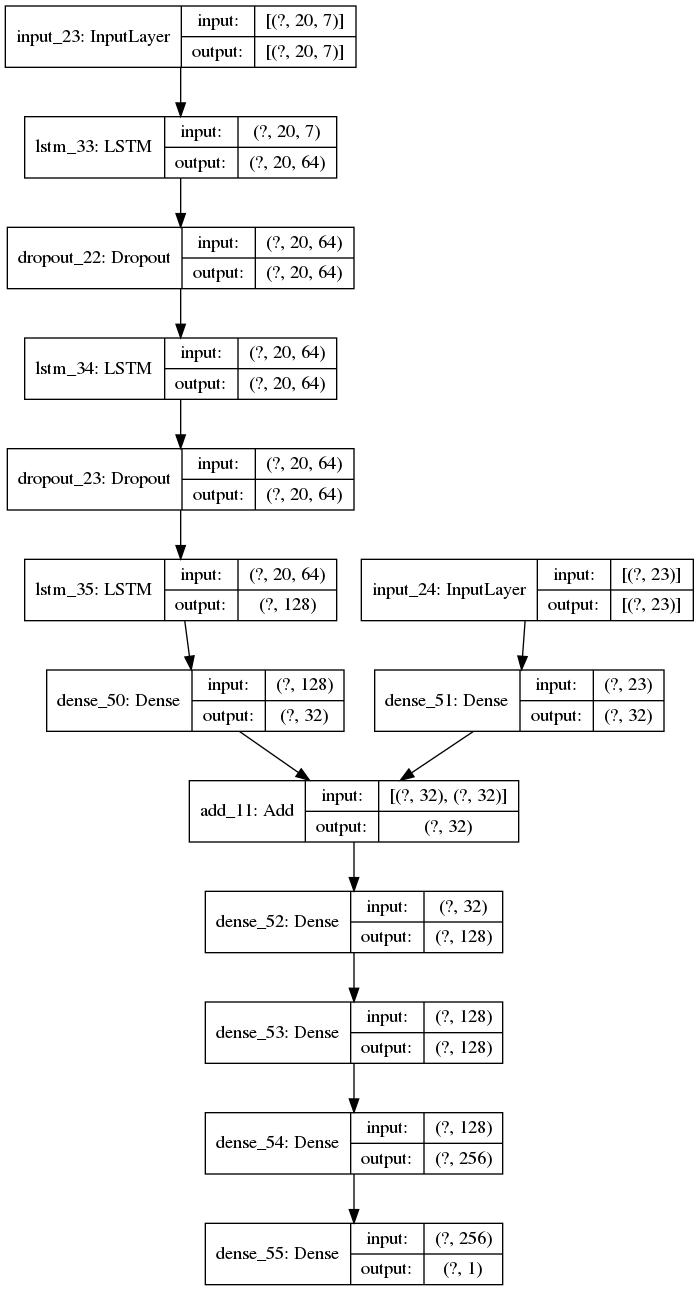

In [308]:
plot_model(Model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [311]:
import tensorflow_core
name_to_save='model_total.h5'
callback_mc=tensorflow_core.keras.callbacks.ModelCheckpoint(filepath=name_to_save,
                                           monitor='loss',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='min',
                                           save_freq='epoch')
    
callback_es=tensorflow_core.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=30, verbose=0,
    mode='min', baseline=None, restore_best_weights=False)
    

Model.fit([RNN_train,Regression_train], y_train, epochs = 800, batch_size = 32,callbacks=[callback_mc,callback_es])

Train on 897 samples
Epoch 1/800
897/897 [==============================] - 1s 1ms/sample - loss: 71.2865
Epoch 2/800
897/897 [==============================] - 1s 943us/sample - loss: 60.1225
Epoch 3/800
897/897 [==============================] - 1s 962us/sample - loss: 68.5816
Epoch 4/800
897/897 [==============================] - 1s 985us/sample - loss: 77.1487
Epoch 5/800
897/897 [==============================] - 1s 926us/sample - loss: 64.5445
Epoch 6/800
897/897 [==============================] - 1s 887us/sample - loss: 63.5107
Epoch 7/800
897/897 [==============================] - 1s 892us/sample - loss: 62.1202
Epoch 8/800
897/897 [==============================] - 1s 933us/sample - loss: 60.3010
Epoch 9/800
897/897 [==============================] - 1s 998us/sample - loss: 74.7501
Epoch 10/800
897/897 [==============================] - 1s 1ms/sample - loss: 64.3273
Epoch 11/800
897/897 [==============================] - 1s 994us/sample - loss: 73.0977
Epoch 12/800
897/897 [==

In [312]:
predicted=Model.predict([RNN_train,Regression_train])

In [313]:
predicted

array([[1028.6527 ],
       [1007.37286],
       [1007.2354 ],
       [1008.0237 ],
       [1007.3314 ],
       [1006.906  ],
       [1006.9811 ],
       [1008.7012 ],
       [1007.5698 ],
       [1008.56555],
       [1009.1134 ],
       [1015.78674],
       [1017.19324],
       [1017.1218 ],
       [1017.95636],
       [1023.58997],
       [1023.11523],
       [1012.1201 ],
       [1012.29694],
       [1010.7726 ],
       [1010.4359 ],
       [1012.3231 ],
       [1009.04456],
       [1012.9245 ],
       [1013.7826 ],
       [1014.3523 ],
       [1016.17395],
       [1023.1384 ],
       [1027.8966 ],
       [1033.4575 ],
       [1038.4623 ],
       [1043.4563 ],
       [1047.7227 ],
       [1050.9163 ],
       [1064.5989 ],
       [1065.7728 ],
       [1058.9353 ],
       [1058.4574 ],
       [1058.3363 ],
       [1058.8126 ],
       [1058.3527 ],
       [1059.775  ],
       [1059.8865 ],
       [1058.3728 ],
       [1032.9174 ],
       [1027.1304 ],
       [1023.56647],
       [1021.

In [314]:
y_train

array([[1010.27001953],
       [ 978.30999756],
       [ 964.90997314],
       [ 980.78997803],
       [ 976.4699707 ],
       [ 964.16998291],
       [ 987.71002197],
       [ 995.16998291],
       [ 992.59002686],
       [1002.22998047],
       [1001.29998779],
       [1003.73999023],
       [ 993.97998047],
       [ 976.7800293 ],
       [ 990.33001709],
       [ 975.92999268],
       [ 968.        ],
       [ 953.65997314],
       [ 971.40002441],
       [ 965.14001465],
       [ 978.76000977],
       [ 996.4699707 ],
       [ 994.13000488],
       [1006.51000977],
       [1000.63000488],
       [1001.80999756],
       [1010.03997803],
       [1024.44995117],
       [1026.86999512],
       [1028.69995117],
       [1025.67004395],
       [1038.94995117],
       [1039.86999512],
       [1052.80004883],
       [1046.        ],
       [1020.03997803],
       [ 987.7800293 ],
       [ 996.19000244],
       [ 995.89001465],
       [ 986.91998291],
       [ 987.58001709],
       [ 992.270

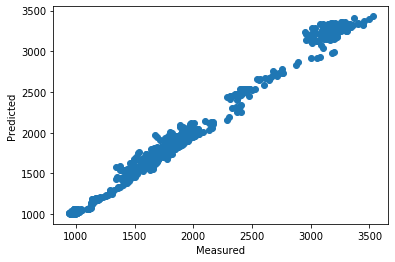

In [316]:
fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train[0].min(),y_train[0].max()], [y_train[0].min(), y_train[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

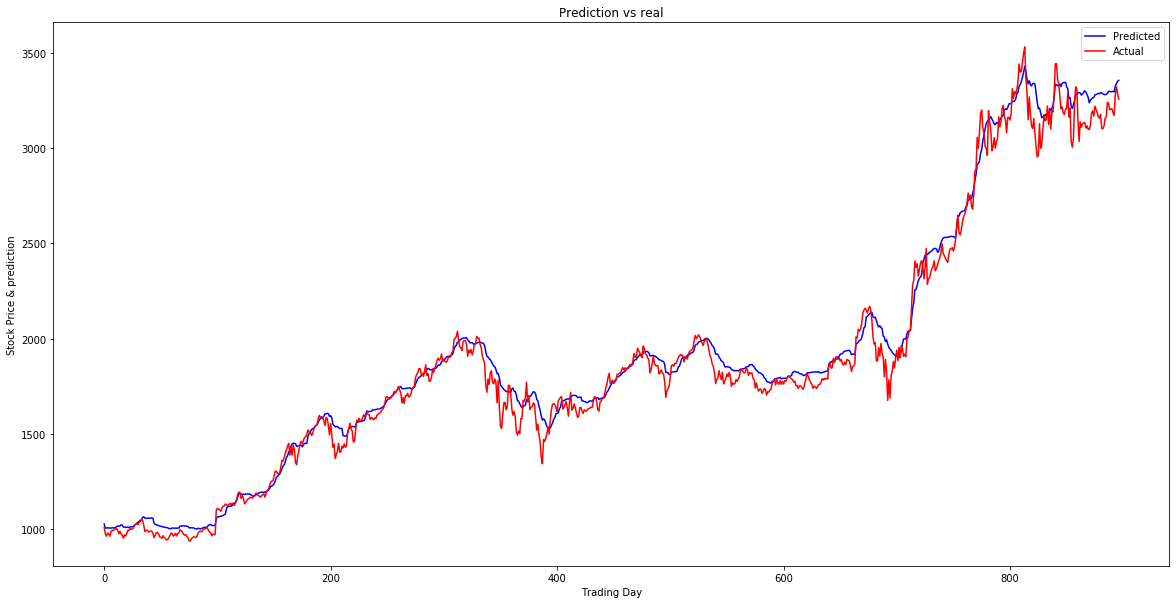

In [317]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
#plt.plot(list(df_3.iloc[:]['Adj Close']), color = 'green', label = 'Adj Close')
plt.plot(predicted, color = 'blue', label = 'Predicted')
plt.plot(y_train, color = 'red', label = 'Actual')

plt.title('Prediction vs real')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & prediction')
plt.legend()
plt.show()